In [1]:
import numpy as np
import os
import re
import scipy.io.wavfile as wavfile

import matplotlib.pyplot as plt
from IPython.display import Audio
import wave

In [2]:
path = os.path.abspath('./EP1/violin.adsr')
try:
    with open(path, 'r') as file:
        adsr = file.readlines()
except EnvironmentError:
    print('invalid filename')
adsr

['0.2 1.0\n', '0.4 0.5\n', '0.3 0.7\n', '0.1 0.0']

In [3]:
path = os.path.abspath('./EP1/jingle_bells.part')
try:
    with open(path, 'r') as file:
        part = file.readlines()
except EnvironmentError:
    print('invalid filename')
part

['150\n',
 'D4 B4 A4 G4 300\n',
 'D4 1100\n',
 'D4 D4 150\n',
 'D4 B4 A4 G4 300\n',
 'E4 1500\n',
 'E4 C5 B4 A4 300\n',
 'F4 1500\n',
 'D5 D5 C5 A4 300\n',
 'B4 1500\n',
 'D4 B4 A4 G4 300\n',
 'D4 1500\n',
 'D4 B4 A4 G4 300\n',
 'E4 1100\n',
 'E4 E4 C5 B4 A4 D5 D5 D5 D5 E5 D5 C5 A4 300\n',
 'G4 1500\n',
 'B4 B4 300\n',
 'B4 700\n',
 'B4 B4 300\n',
 'B4 700\n',
 'B4 D5 300\n',
 'G4 500\n',
 'A4 150\n',
 'B4 1500\n',
 'C5 C5 300\n',
 'C5 500\n',
 'C5 150\n',
 'C5 B4 B4 300\n',
 'B4 B4 150\n',
 'B4 A4 A4 B4 300\n',
 'A4 D5 700\n',
 'B4 B4 300\n',
 'B4 700\n',
 'B4 B4 300\n',
 'B4 700\n',
 'B4 D5 300\n',
 'G4 500\n',
 'A4 150\n',
 'B4 1500\n',
 'C5 C5 300\n',
 'C5 500\n',
 'C5 150\n',
 'C5 B4 B4 300\n',
 'B4 B4 150\n',
 'D5 D5 C5 A4 300\n',
 'G4 1500']

In [4]:
def C(octave):
    return 16.352*2**int(octave)

def Db(octave):
    return 17.324*2**int(octave)

def D(octave):
    return 18.354*2**int(octave)

def Eb(octave):
    return 19.445*2**int(octave)
    
def E(octave):
    return 20.602*2**int(octave)

def F(octave):
    return 21.827*2**int(octave)

def Gb(octave):
    return 23.125*2**int(octave)

def G(octave):
    return 24.500*2**int(octave)

def Ab(octave):
    return 25.957*2**int(octave)

def A(octave):
    return 27.500*2**int(octave)

def Bb(octave):
    return 29.135*2**int(octave)

def B(octave):
    return 30.868*2**int(octave)

In [5]:
pitch = {
    'C': C,
    'C#': Db,
    'Db': Db,
    'D': D,
    'D#': Eb,
    'Eb': Eb,
    'E': E,
    'F': F,
    'F#': Gb,
    'Gb': Gb,
    'G': G,
    'G#': Ab,
    'Ab': Ab,
    'A': A,
    'A#': Bb,
    'Bb': Bb,
    'B': B
}

In [6]:
def get_freq(note):
    [tone, octave, []] = re.split('(-?\d+)', note)
    return pitch[tone](octave)

In [21]:
def get_amp(T):
    num_samples = int(N*T)
    a = np.linspace(start=0, stop=0, endpoint=True, num=num_samples)
    
    ta, la = np.float_(adsr[0].split())
    td, ld = np.float_(adsr[1].split())
    ts, ls = np.float_(adsr[2].split())
    tr, lr = np.float_(adsr[3].split())
    
    t0 = 0
    # attack
    t1 = int(num_samples*ta)
    t = np.linspace(start=0, stop=ta*T, endpoint=True, num=int(num_samples*ta))
    a[t0:t1] = t * (la/(ta*T))
    
    # decay
    t2 = int(num_samples*td) + t1
    t = np.linspace(start=0, stop=td*T, endpoint=True, num=int(num_samples*td))
    a[t1:t2] = t * (ld-la)/(td*T) + la
    
    # sustain
    t3 = int(num_samples*ts) + t2
    t = np.linspace(start=0, stop=ts*T, endpoint=True, num=int(num_samples*ts))
    a[t2:t3] = t * (ls-ld)/(ts*T) + ld
        
    # release
    t4 = int(num_samples*tr) + t3
    t = np.linspace(start=0, stop=tr*T, endpoint=True, num=int(num_samples*tr))
    a[t3:t4] = t * (lr-ls)/(tr*T) + ls
    
    return a

In [22]:
def get_sample(note, T):
    num_samples = int(N*T)
    t = np.linspace(start=0, stop=T, endpoint=True, num=num_samples)
    k = get_freq(note)
    a = get_amp(T)
    return a * np.sin(2*np.pi*k*t)

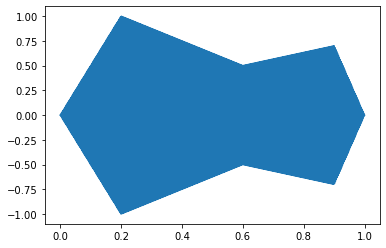

In [27]:
N = 44100
T = 1
num_samples = int(N*T)
t = np.linspace(start=0, stop=T, endpoint=True, num=num_samples)
s = get_sample('F4', T)
plt.plot(t, s)
plt.show()

In [28]:
def get_melody():
    melody = []
    length = 0
    for i in range(1, len(part)):
        seq = part[i].split()
        T = int(re.split('(\n)', seq[len(seq)-1])[0])/1000
        for j in range(0, len(seq)-1):
            note = seq[j]
            sample = get_sample(note, T)
            melody = np.concatenate((melody, sample))
            length = length + T
    return melody, length

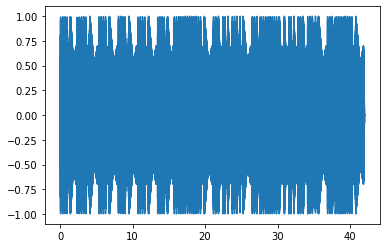

In [29]:
melody, length = get_melody()
num_samples = len(melody)
t = np.linspace(start=0, stop=length, num=num_samples)
plt.plot(t, melody)
plt.show()

In [69]:
audio = ((melody+1)*16383).astype(np.uint16)
Audio(audio, rate=N)

In [70]:
(melody).max()*32768

32757.98388353582

In [71]:
mono = np.reshape(audio, (len(audio),1))
stereo = np.hstack((mono, mono))
stereo

array([[16383, 16383],
       [16383, 16383],
       [16384, 16384],
       ...,
       [16382, 16382],
       [16382, 16382],
       [16383, 16383]], dtype=uint16)

In [72]:
with wave.open('audio.wav', 'wb') as file:
    file.setnchannels(2)
    file.setsampwidth(2)
    file.setframerate(N)
    file.writeframes(stereo)